<a href="https://colab.research.google.com/github/PhanDuyNhat/AI/blob/Code_AI/recognition_of_all_members_of_class_from_face_images_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 28, 38, 32)        896       
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 14, 19, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 12, 17, 64)        18496     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 6, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 6, 8, 64)          36928     
                                                                 
 conv2d_78 (Conv2D)          (None, 6, 8, 64)        

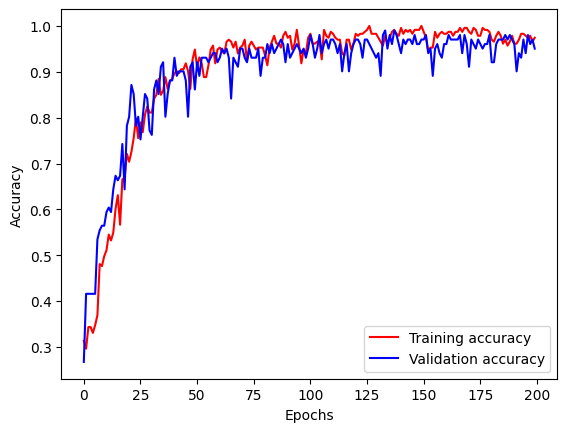

In [72]:
# Import necessary libraries
import os
from os import listdir
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
#from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, BatchNormalization, LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from numpy import asarray, save
from keras.utils import to_categorical

# Set the data folder and parameters
folder = '/content/drive/MyDrive/PIC_AI/khuon_mat/'
input_shape = (30,40, 3)


# Load and preprocess the data
photos, labels = list(), list()
for file in listdir(folder):
    output = 0.0
    if  file.startswith('binh'):
        output = 1.0
    elif file.startswith('dangkhoa'):
        output = 2.0
    elif file.startswith('quanghuy'):
        output = 3.0
    elif file.startswith('ha'):
        output = 4.0
    elif file.startswith('hieu'):
        output = 5.0
    elif file.startswith('hoang'):
        output = 6.0
    elif file.startswith('khuong'):
        output = 7.0
    elif file.startswith('kyanh'):
        output = 8.0
    elif file.startswith('hoaiphong'):
        output = 9.0
    elif file.startswith('hau'):
        output = 10.0    
    elif file.startswith('duynhat'):
        output = 11.0

    photo = load_img(folder + file, target_size=input_shape)
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = np.asarray(photos)
labels = np.asarray(labels)

save('/content/drive/MyDrive/PIC_AI/Models/face_photos.npy', photos)
save('/content/drive/MyDrive/PIC_AI/Models/face_labels.npy', labels)

photos = np.load('/content/drive/MyDrive/PIC_AI/Models/face_photos.npy')
labels = np.load('/content/drive/MyDrive/PIC_AI/Models/face_labels.npy')

# Preprocess data
photos = photos.astype('float32') / 255.0
labels = to_categorical(labels, num_classes=12)


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(photos, labels, test_size=0.3, random_state=100)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(X_train)

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 40, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(12, activation='softmax'))
model.summary()
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with data augmentation
train = model.fit(datagen.flow(X_train, y_train, batch_size=20), epochs=200, validation_data=(X_val, y_val))

# Evaluate the CNN model
score = model.evaluate(X_val, y_val, verbose=0)

# Evaluate the CNN model
loss, accuracy_val = model.evaluate(X_val, y_val)
print("Loss:", loss)
print("Accuracy:", accuracy_val)

# Save the trained CNN model
model.save('/content/drive/MyDrive/colab/recognition of all members of class from face images.h5')


import matplotlib.pyplot as plt

accuracy = train.history['accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r-', label='Training accuracy')

val_accuracy = train.history['val_accuracy']  # Use 'val_accuracy' instead of 'accuracy_val'
plt.plot(epochs, val_accuracy, 'b-', label='Validation accuracy')  # Use 'val_accuracy' instead of 'accuracy_val'

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 116ms/step
hoaiphong


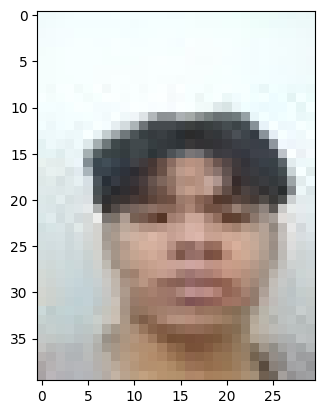

1/1 [==============================] - 0s 25ms/step
quanghuy


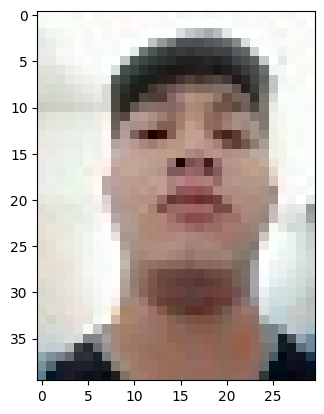

1/1 [==============================] - 0s 25ms/step
hoang


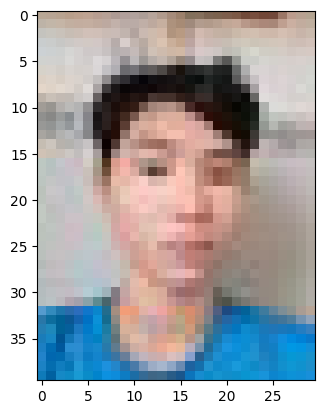

1/1 [==============================] - 0s 25ms/step
ha


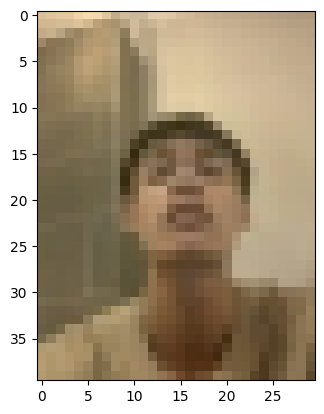

1/1 [==============================] - 0s 24ms/step
kyanh


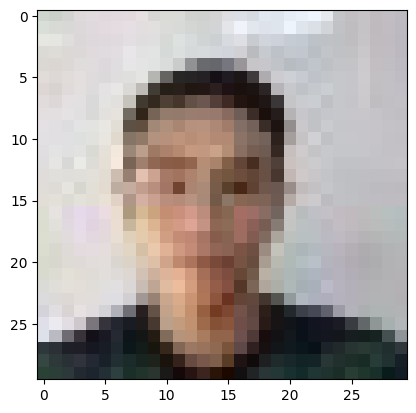

1/1 [==============================] - 0s 24ms/step
duynhat


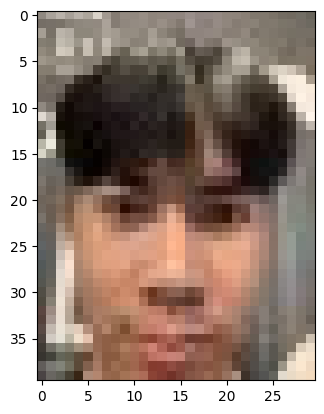

1/1 [==============================] - 0s 24ms/step
binh


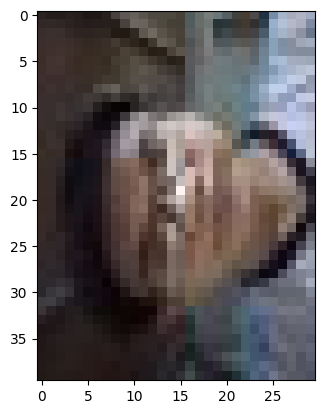

1/1 [==============================] - 0s 24ms/step
ha


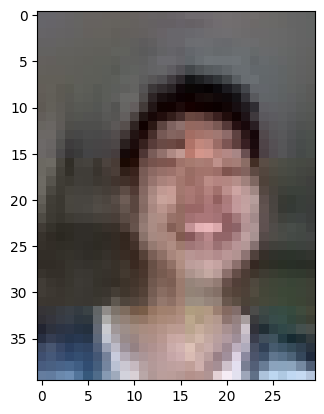

1/1 [==============================] - 0s 28ms/step
khuong


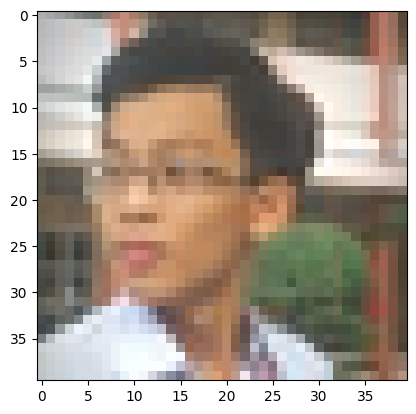

1/1 [==============================] - 0s 26ms/step
hieu


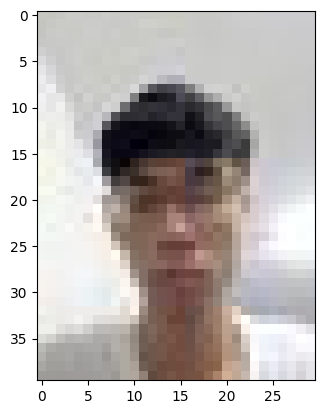

In [73]:
#Testing
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

folder = '/content/drive/MyDrive/PIC_TEST/khuon_mat_2'
for file in listdir(folder):
  if not file.endswith('.jpg'):
    continue # Skip directories and non-image files
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (30, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  
  class_name=[' ','binh', 'dangkhoa', 'quanghuy', 'ha', 'hieu', 'hoang',
            'khuong', 'kyanh', 'hoaiphong', 'hau', 'duynhat']
  print(class_name[result])
  plt.show()